<a href="https://colab.research.google.com/github/pkpk1717/TMDB-Box-office-revenue/blob/master/TMDB_Box_Office_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
import zipfile
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import shutil

    100% |████████████████████████████████| 993kB 19.8MB/s 


In [0]:
## GOOGLE DRIVE AUTHENTICATION

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
## SEACHING FOR THE ZIP FILE AND THEN UNZIPPING IT IN COLAB AND DELETING UN-NECESSARY FILES

fid = drive.ListFile({'q':"title='train.csv'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('train.csv')

fid = drive.ListFile({'q':"title='test.csv'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('test.csv')

In [5]:
df = pd.read_csv('train.csv')
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
test = pd.read_csv('test.csv')
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [7]:
print(df.shape)
df.describe()

(3000, 23)


,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [8]:
print(test.shape)
test.describe()

(4398, 22)


,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [9]:
df.isna().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
original_language           0
budget                      0
imdb_id                     0
revenue                     0
original_title              0
popularity                  0
release_date                0
status                      0
title                       0
id                          0
dtype: int64

In [10]:
test.isna().sum().sort_values(ascending=False)

belongs_to_collection    3521
homepage                 2978
tagline                   863
Keywords                  393
production_companies      258
production_countries      102
spoken_languages           42
crew                       22
genres                     16
overview                   14
cast                       13
runtime                     4
title                       3
status                      2
poster_path                 1
release_date                1
original_language           0
imdb_id                     0
original_title              0
popularity                  0
budget                      0
id                          0
dtype: int64

### Cleaning and analysing the dataset

Let's remove few columns which does not look like to have importance and also few of the columns which have a lot of NaN's.

In [11]:
df['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [12]:
df['homepage'][:5]

0                                  NaN
1                                  NaN
2    http://sonyclassics.com/whiplash/
3           http://kahaanithefilm.com/
4                                  NaN
Name: homepage, dtype: object

In [13]:
## tagline features seems important but there are too many NaN values(1/6th of dataset).
df['tagline'][0]

'The Laws of Space and Time are About to be Violated.'

In [14]:
df['Keywords'][0]

"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]"

In [15]:
df['production_companies'][0]

"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"

In [16]:
df['production_countries'][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [17]:
df['spoken_languages'][0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [18]:
df['crew'][0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [19]:
df['cast'][0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [20]:
df['overview'][0]

'When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.'

In [21]:
dropping_cols = ['belongs_to_collection','homepage','tagline']
df.drop(dropping_cols,axis=1,inplace=True)
print(df.shape)
df.head()

(3000, 20)


,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [22]:
dropping_cols = ['belongs_to_collection','homepage','tagline']
test.drop(dropping_cols,axis=1,inplace=True)
print(test.shape)
test.head()

(4398, 19)


,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew
0,3001,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [23]:
df.isna().sum().sort_values(ascending=False)

Keywords                276
production_companies    156
production_countries     55
spoken_languages         20
crew                     16
cast                     13
overview                  8
genres                    7
runtime                   2
poster_path               1
original_title            0
budget                    0
imdb_id                   0
original_language         0
revenue                   0
popularity                0
release_date              0
status                    0
title                     0
id                        0
dtype: int64

In [24]:
test.isna().sum().sort_values(ascending=False)

Keywords                393
production_companies    258
production_countries    102
spoken_languages         42
crew                     22
genres                   16
overview                 14
cast                     13
runtime                   4
title                     3
status                    2
release_date              1
poster_path               1
popularity                0
original_title            0
original_language         0
imdb_id                   0
budget                    0
id                        0
dtype: int64

In [25]:
df.dropna(inplace=True)
df.shape

(2606, 20)

In [26]:
test.dropna(inplace=True)
test.shape

(3814, 19)

In [27]:
df.isna().sum().sort_values(ascending=False)

revenue                 0
crew                    0
budget                  0
genres                  0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
title                   0
Keywords                0
cast                    0
id                      0
dtype: int64

In [28]:
test.isna().sum().sort_values(ascending=False)

crew                    0
poster_path             0
budget                  0
genres                  0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
cast                    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
title                   0
Keywords                0
id                      0
dtype: int64

## Lets start to pre-process the dataset to use it for prediction

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


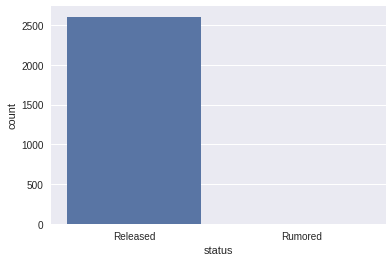

In [29]:
sns.countplot(x='status',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


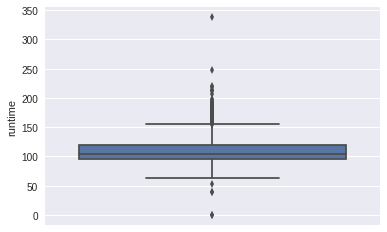

In [30]:
sns.boxplot(data=df,y='runtime')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2606 entries, 0 to 2999
Data columns (total 20 columns):
id                      2606 non-null int64
budget                  2606 non-null int64
genres                  2606 non-null object
imdb_id                 2606 non-null object
original_language       2606 non-null object
original_title          2606 non-null object
overview                2606 non-null object
popularity              2606 non-null float64
poster_path             2606 non-null object
production_companies    2606 non-null object
production_countries    2606 non-null object
release_date            2606 non-null object
runtime                 2606 non-null float64
spoken_languages        2606 non-null object
status                  2606 non-null object
title                   2606 non-null object
Keywords                2606 non-null object
cast                    2606 non-null object
crew                    2606 non-null object
revenue                 2606 non-null 

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


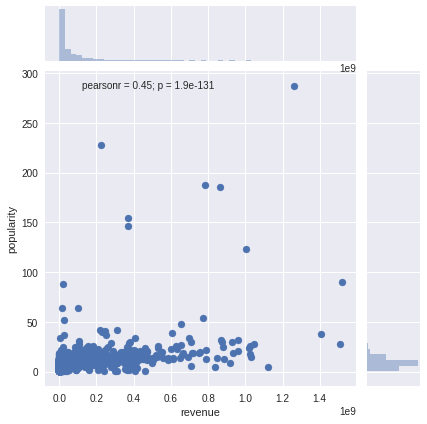

In [32]:
sns.jointplot(x='revenue',y='popularity',data=df)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


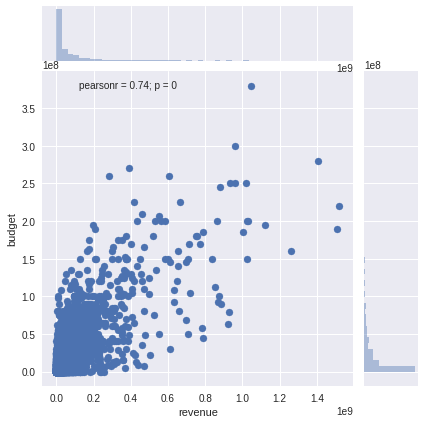

In [33]:
sns.jointplot(x='revenue',y='budget',data=df)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


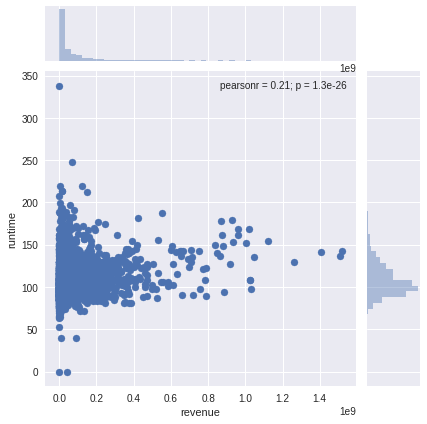

In [34]:
sns.jointplot(x='revenue',y='runtime',data=df)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


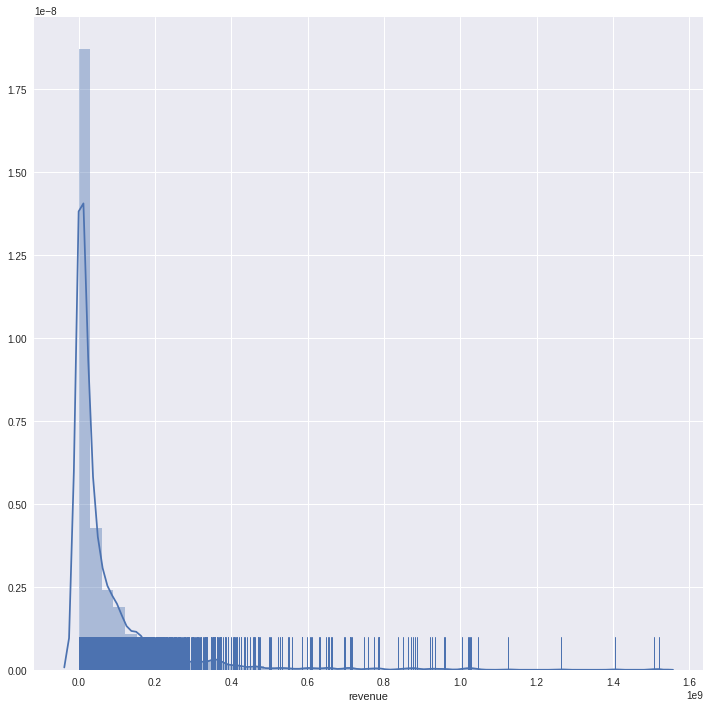

In [35]:
plt.figure(figsize=(12,12))
sns.distplot(df['revenue'],rug=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


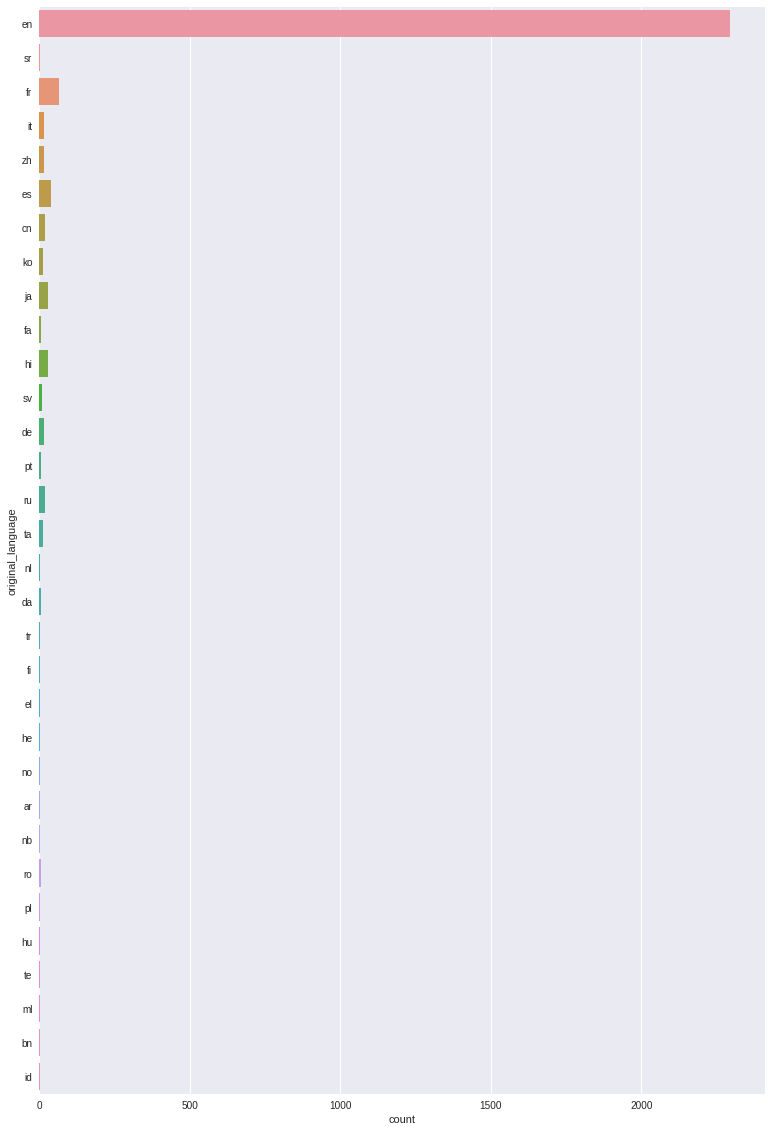

In [36]:
plt.figure(figsize=(13,20))
sns.countplot(y='original_language',data=df)

Main language of movies are English.

In [37]:
df['status'].value_counts()

Released    2605
Rumored        1
Name: status, dtype: int64

In [38]:
print(df['revenue'][df['status']=='Rumored'])

1216    13418091
Name: revenue, dtype: int64


In [0]:
## applying log to revenue to normally distribute.
df['logrevenue'] = np.log1p(df['revenue'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


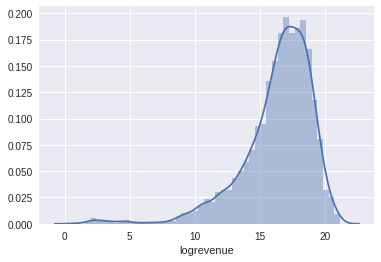

In [40]:
sns.distplot(df['logrevenue'])

In [0]:
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)
df['release_day'] = df['release_date'].apply(lambda t: t.day)
df['release_weekday'] = df['release_date'].apply(lambda t: t.weekday())
df['release_month'] = df['release_date'].apply(lambda t: t.month)

# Year was being interpreted as future dates in some cases so I had to adjust some values
df['release_year'] = df['release_date'].apply(lambda t: t.year if t.year < 2018 else t.year -100)

In [42]:
df[['release_date','release_day','release_weekday','release_month','release_year']].head()

,release_date,release_day,release_weekday,release_month,release_year
0,2015-02-20,20,4,2,2015
1,2004-08-06,6,4,8,2004
2,2014-10-10,10,4,10,2014
8,1996-02-16,16,4,2,1996
9,2003-04-16,16,2,4,2003


In [0]:
test['release_date'] = pd.to_datetime(test['release_date'], infer_datetime_format=True)
test['release_day'] = test['release_date'].apply(lambda t: t.day)
test['release_weekday'] = test['release_date'].apply(lambda t: t.weekday())
test['release_month'] = test['release_date'].apply(lambda t: t.month)

# Year was being interpreted as future dates in some cases so I had to adjust some values
test['release_year'] = test['release_date'].apply(lambda t: t.year if t.year < 2018 else t.year -100)

In [44]:
test[['release_date','release_day','release_weekday','release_month','release_year']].head()

,release_date,release_day,release_weekday,release_month,release_year
1,2058-05-19,19,6,5,1958
2,1997-05-23,23,4,5,1997
3,2010-09-04,4,5,9,2010
5,1996-02-07,7,2,2,1996
6,2010-12-23,23,3,12,2010


In [45]:
print(len(df[df['runtime']==0]))
print(len(test[test['runtime']==0]))

2
0


In [0]:
from collections import defaultdict
def map_runtime(df):
    df['runtime'].fillna(0)
    
    run = df[(df['runtime'].notnull()) & (df['runtime'] != 0)]
    year_mean = run.groupby(['release_year'])['runtime'].agg('mean')
    d = dict(year_mean)
    
    for i in df[df['runtime'] == 0]:
        df['runtime'] = df.loc[:, 'release_year'].map(d)
    
    return df
  
test = map_runtime(test)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


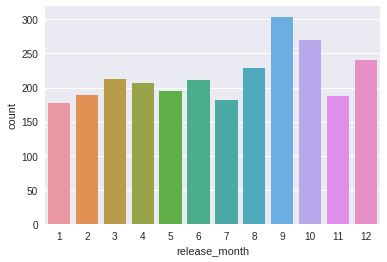

In [49]:
sns.countplot(x='release_month',data=df)

Many movies come in the month of september and october

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


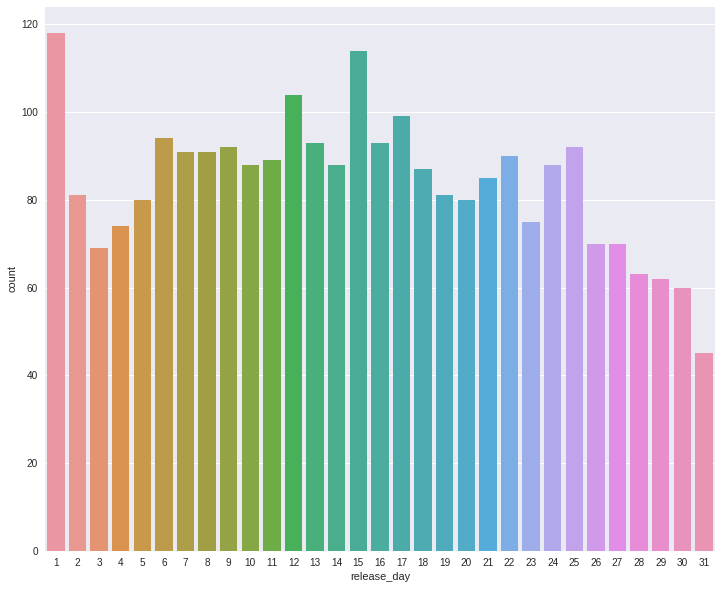

In [50]:
plt.figure(figsize=(12,10))
sns.countplot(x='release_day',data=df)

Most of the movies are either released on 1st of every month or 15th.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]), <a list of 90 Text xticklabel objects>)

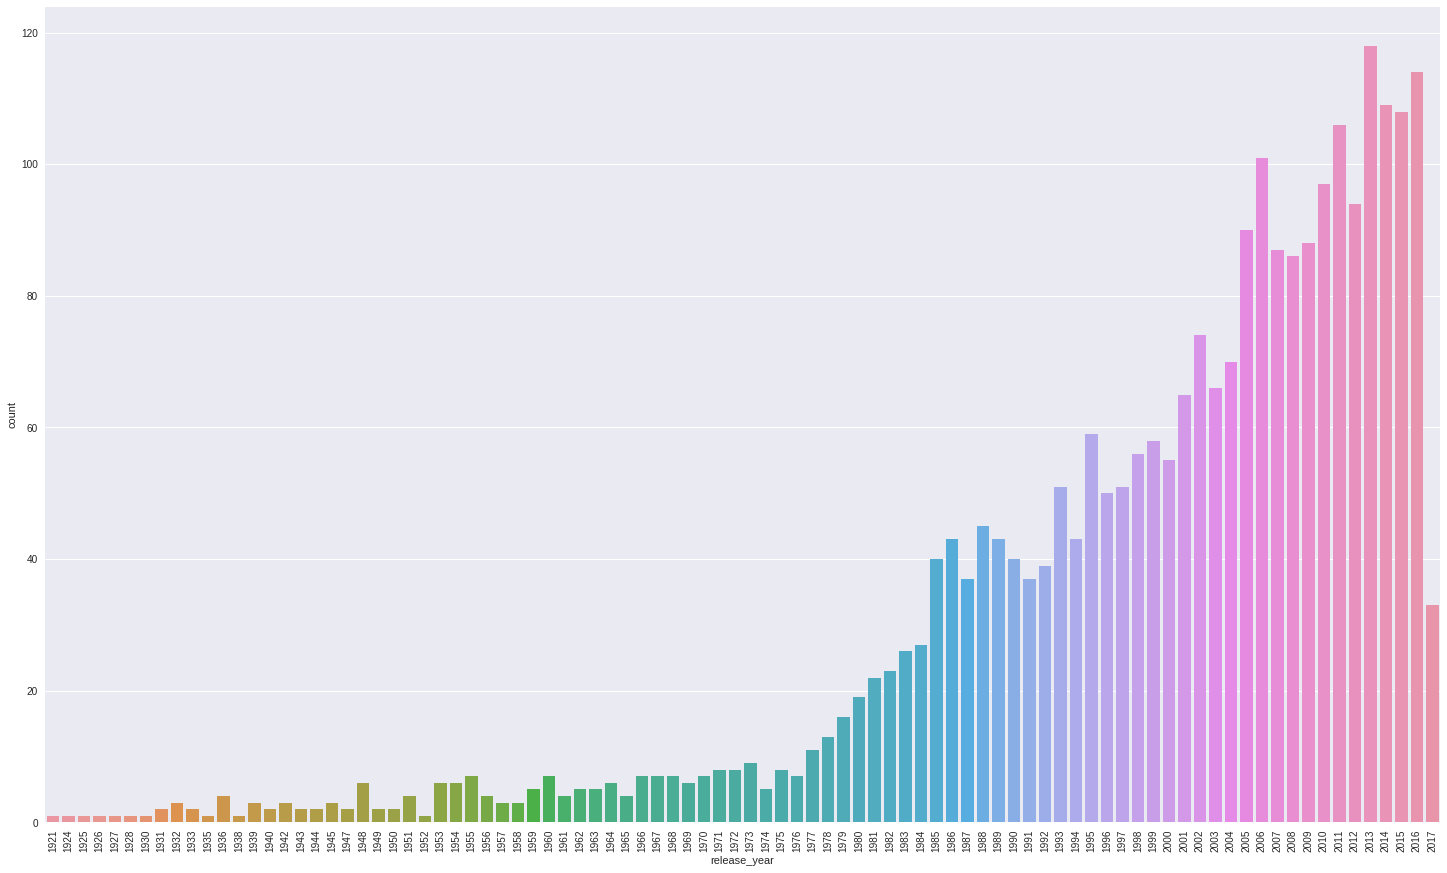

In [51]:
plt.figure(figsize=(25,15))
sns.countplot(x='release_year',data=df)
plt.xticks(rotation=90)

Maximum number of movies released are in year 2013 to 2017

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


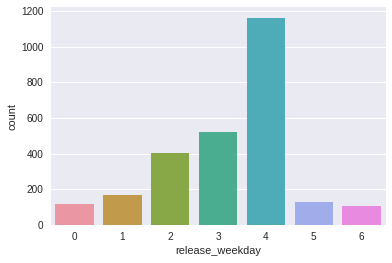

In [53]:
sns.countplot(x='release_weekday',data=df)

Most of the movies are released on Friday, Thrusday and Wednesday.

In [54]:
df['genres'].describe()

count                              2606
unique                              803
top       [{'id': 18, 'name': 'Drama'}]
freq                                229
Name: genres, dtype: object

In [55]:
len(df[df['budget']==0])

614

In [58]:
import scipy.stats as stats
X = df[df['budget'] != 0]
for i in X.select_dtypes(include='number', exclude='datetime'):
    print(i, stats.pearsonr(X.budget, X[i]))

id (0.021414364889835395, 0.33944024164638087)
budget (1.0, 0.0)
popularity (0.2969912769463591, 7.512253162747816e-42)
runtime (0.21253907332556757, 8.823892195454841e-22)
revenue (0.732132958093694, 0.0)
logrevenue (0.49860572539147596, 1.100194310041583e-125)
release_day (0.023619958760424126, 0.2920261518050205)
release_weekday (-0.11287502976286949, 4.399513517982346e-07)
release_month (0.020107513824845925, 0.36973895528698353)
release_year (0.2710624938352254, 6.91189222264419e-35)


In [0]:
# release_year and popularity correlate most strongly with budget
def map_budget(df):
    d = defaultdict()
    #df['budget'] = df['budget'].fillna(0)
    X = df[df['budget'] != 0]
    
    year_mean = pd.Series(X.groupby(['release_year'])['budget'].agg('mean'))
    d = dict(year_mean)
    
    for i in df[df['budget'] == 0]:
        df['budget'] = df.loc[:, 'release_year'].map(d)
    
    # In a few cases, there are only 1 or 2 movies provided from a given year and are filled with Na values
    df.budget = df.sort_values(by='release_year').budget.fillna(method='ffill')
    
    return df

In [60]:
df = map_budget(df)
df.budget.describe()

count    2.606000e+03
mean     3.176739e+07
std      1.327617e+07
min      2.500000e+05
25%      2.218276e+07
50%      3.672500e+07
75%      4.038036e+07
max      6.428481e+07
Name: budget, dtype: float64

In [61]:
print(len(df[df['budget']==0]))

0


In [62]:
len(test[test['budget']==0])

923

In [64]:
test = map_budget(test)
len(test[test['budget']==0])

0

In [65]:
df.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,title,Keywords,cast,crew,revenue,logrevenue,release_day,release_weekday,release_month,release_year
0,1,4.818330e+07,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.326300,20,4,2,2015
1,2,4.120444e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18.370959,6,4,8,2004
2,3,3.936394e+07,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,16.387512,10,4,10,2014
8,9,3.498643e+07,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,17.351454,16,4,2,1996
9,10,4.015557e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",...,A Mighty Wind,"[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan Steinb...","[{'credit_id': '52fe45609251416c750545b3', 'de...",18750246,16.746717,16,2,4,2003


In [66]:
test.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,spoken_languages,status,title,Keywords,cast,crew,release_day,release_weekday,release_month,release_year
1,3002,2.479200e+06,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",19,6,5,1958
2,3003,3.454290e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",23,4,5,1997
3,3004,4.378603e+07,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...",...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",4,5,9,2010
5,3006,3.040300e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0120238,en,SubUrbia,A group of suburban teenagers try to support e...,8.679350,/7PdRbG09K9JHYyOwwCSn3OdJb0N.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 9...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,SubUrbia,"[{'id': 10183, 'name': 'independent film'}]","[{'cast_id': 4, 'character': 'Pony', 'credit_i...","[{'credit_id': '52fe4576c3a368484e05c901', 'de...",7,2,2,1996
6,3007,4.378603e+07,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",tt1517177,de,Drei,Hanna and Simon are in a 20 year marriage with...,4.898882,/cIIQJvsZePyYYjlQJMU3J0fcinu.jpg,"[{'name': 'X-Filme Creative Pool', 'id': 1972}...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Three,"[{'id': 572, 'name': 'sex'}, {'id': 154937, 'n...","[{'cast_id': 2, 'character': 'Hanna', 'credit_...","[{'credit_id': '52fe485bc3a36847f816358d', 'de...",23,3,12,2010


In [0]:
df['poster_path'].fillna(0, inplace=True)
df.loc[df['poster_path'] != 0, 'poster_path'] = 1

test['poster_path'].fillna(0, inplace=True)
test.loc[test['poster_path'] != 0, 'poster_path'] = 1

In [0]:
genres= df.genres.str.get_dummies(sep=',')
df =pd.concat([df,genres],axis=1)

In [70]:
df.drop(['genres'],axis=1,inplace=True)
df.head()

,id,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,[{'id': 27,[{'id': 28,[{'id': 35,[{'id': 36,[{'id': 37,[{'id': 53,[{'id': 80,[{'id': 878,[{'id': 9648,[{'id': 99
0,1,4.818330e+07,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,1,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,1,0,0,0,0,0,0,0
1,2,4.120444e+07,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,1,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,1,0,0,0,0,0,0,0
2,3,3.936394e+07,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,1,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,0,0
8,9,3.498643e+07,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,1,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,1,0,0,0,0,0,0,0,0
9,10,4.015557e+07,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,1,"[{'name': 'Castle Rock Entertainment', 'id': 97}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,1,0,0,0,0,0,0,0


In [73]:
df.shape

(2606, 102)

In [0]:
genres= test.genres.str.get_dummies(sep=',')
test =pd.concat([test,genres],axis=1)

In [72]:
test.drop(['genres'],axis=1,inplace=True)
test.shape

(3814, 98)

In [74]:
dropping_cols = ['id','imdb_id','original_title','overview','production_companies','status','title','Keywords','cast','crew','production_countries','release_date','spoken_languages']
df.drop(dropping_cols,axis=1,inplace=True)
print(df.shape)
df.head()

(2606, 89)


,budget,original_language,popularity,poster_path,runtime,revenue,logrevenue,release_day,release_weekday,release_month,...,[{'id': 27,[{'id': 28,[{'id': 35,[{'id': 36,[{'id': 37,[{'id': 53,[{'id': 80,[{'id': 878,[{'id': 9648,[{'id': 99
0,4.818330e+07,en,6.575393,1,93.0,12314651,16.326300,20,4,2,...,0,0,1,0,0,0,0,0,0,0
1,4.120444e+07,en,8.248895,1,113.0,95149435,18.370959,6,4,8,...,0,0,1,0,0,0,0,0,0,0
2,3.936394e+07,en,64.299990,1,105.0,13092000,16.387512,10,4,10,...,0,0,0,0,0,0,0,0,0,0
8,3.498643e+07,en,6.902423,1,100.0,34327391,17.351454,16,4,2,...,0,1,0,0,0,0,0,0,0,0
9,4.015557e+07,en,4.672036,1,91.0,18750246,16.746717,16,2,4,...,0,0,1,0,0,0,0,0,0,0


In [75]:
dropping_cols = ['id','imdb_id','original_title','overview','production_companies','status','title','Keywords','cast','crew','production_countries','release_date','spoken_languages']
test.drop(dropping_cols,axis=1,inplace=True)
print(test.shape)
test.head()

(3814, 85)


,budget,original_language,popularity,poster_path,runtime,release_day,release_weekday,release_month,release_year,'name': 'Action'},...,[{'id': 27,[{'id': 28,[{'id': 35,[{'id': 36,[{'id': 37,[{'id': 53,[{'id': 80,[{'id': 878,[{'id': 9648,[{'id': 99
1,2.479200e+06,en,3.559789,1,110.600000,19,6,5,1958,0,...,1,0,0,0,0,0,0,0,0,0
2,3.454290e+07,en,8.085194,1,109.988636,23,4,5,1997,0,...,0,0,1,0,0,0,0,0,0,0
3,4.378603e+07,fr,8.596012,1,104.636943,4,5,9,2010,0,...,0,0,0,0,0,0,0,0,0,0
5,3.040300e+07,en,8.679350,1,108.192308,7,2,2,1996,0,...,0,0,1,0,0,0,0,0,0,0
6,4.378603e+07,de,4.898882,1,104.636943,23,3,12,2010,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
just_dummies = pd.get_dummies(df['original_language'])

df = pd.concat([df, just_dummies], axis=1)      
df.drop(['original_language'], inplace=True, axis=1)
print(df.shape)
df.head()

(2606, 120)


,budget,popularity,poster_path,runtime,revenue,logrevenue,release_day,release_weekday,release_month,release_year,...,pl,pt,ro,ru,sr,sv,ta,te,tr,zh
0,4.818330e+07,6.575393,1,93.0,12314651,16.326300,20,4,2,2015,...,0,0,0,0,0,0,0,0,0,0
1,4.120444e+07,8.248895,1,113.0,95149435,18.370959,6,4,8,2004,...,0,0,0,0,0,0,0,0,0,0
2,3.936394e+07,64.299990,1,105.0,13092000,16.387512,10,4,10,2014,...,0,0,0,0,0,0,0,0,0,0
8,3.498643e+07,6.902423,1,100.0,34327391,17.351454,16,4,2,1996,...,0,0,0,0,0,0,0,0,0,0
9,4.015557e+07,4.672036,1,91.0,18750246,16.746717,16,2,4,2003,...,0,0,0,0,0,0,0,0,0,0


In [77]:
just_dummies = pd.get_dummies(test['original_language'])

test = pd.concat([test, just_dummies], axis=1)      
test.drop(['original_language'], inplace=True, axis=1)
print(test.shape)
test.head()

(3814, 121)


,budget,popularity,poster_path,runtime,release_day,release_weekday,release_month,release_year,'name': 'Action'},'name': 'Action'}],...,ro,ru,sr,sv,ta,te,th,tr,xx,zh
1,2.479200e+06,3.559789,1,110.600000,19,6,5,1958,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.454290e+07,8.085194,1,109.988636,23,4,5,1997,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.378603e+07,8.596012,1,104.636943,4,5,9,2010,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.040300e+07,8.679350,1,108.192308,7,2,2,1996,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4.378603e+07,4.898882,1,104.636943,23,3,12,2010,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df.reset_index(inplace=True)
test.reset_index(inplace=True)

In [78]:
print(df.shape)
df.head(5)

(2606, 120)


,budget,popularity,poster_path,runtime,revenue,logrevenue,release_day,release_weekday,release_month,release_year,...,pl,pt,ro,ru,sr,sv,ta,te,tr,zh
0,4.818330e+07,6.575393,1,93.0,12314651,16.326300,20,4,2,2015,...,0,0,0,0,0,0,0,0,0,0
1,4.120444e+07,8.248895,1,113.0,95149435,18.370959,6,4,8,2004,...,0,0,0,0,0,0,0,0,0,0
2,3.936394e+07,64.299990,1,105.0,13092000,16.387512,10,4,10,2014,...,0,0,0,0,0,0,0,0,0,0
8,3.498643e+07,6.902423,1,100.0,34327391,17.351454,16,4,2,1996,...,0,0,0,0,0,0,0,0,0,0
9,4.015557e+07,4.672036,1,91.0,18750246,16.746717,16,2,4,2003,...,0,0,0,0,0,0,0,0,0,0


In [79]:
print(test.shape)
test.head(5)

(3814, 121)


,budget,popularity,poster_path,runtime,release_day,release_weekday,release_month,release_year,'name': 'Action'},'name': 'Action'}],...,ro,ru,sr,sv,ta,te,th,tr,xx,zh
1,2.479200e+06,3.559789,1,110.600000,19,6,5,1958,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.454290e+07,8.085194,1,109.988636,23,4,5,1997,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.378603e+07,8.596012,1,104.636943,4,5,9,2010,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.040300e+07,8.679350,1,108.192308,7,2,2,1996,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4.378603e+07,4.898882,1,104.636943,23,3,12,2010,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building model for training and predictions 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [85]:
X = df.drop(['revenue'],axis=1)
y = df['revenue']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)
print("Shape of X_train is : ",X_train.shape[0])
print("Shape of y_train is : ",y_train.shape[0])
print("Shape of X_test is : ",X_test.shape[0])
print("Shape of y_test is : ",y_test.shape[0])

Shape of X_train is :  2084
Shape of y_train is :  2084
Shape of X_test is :  522
Shape of y_test is :  522


In [86]:
X_train.head()

,budget,popularity,poster_path,runtime,logrevenue,release_day,release_weekday,release_month,release_year,'name': 'Action'},...,pl,pt,ro,ru,sr,sv,ta,te,tr,zh
2710,3.782991e+07,1.697118,1,77.0,14.946913,16,0,5,2011,0,...,0,0,0,0,0,0,0,0,0,0
2520,7.777857e+06,5.810716,1,134.0,18.322124,8,2,9,1976,0,...,0,0,0,0,0,0,0,0,0,0
1573,3.722982e+07,2.333661,1,84.0,13.788680,7,2,6,2006,0,...,0,0,0,0,0,0,0,0,0,0
2152,3.782405e+07,4.468247,1,84.0,16.828206,23,4,2,2007,1,...,0,0,0,0,0,0,0,0,0,0
838,3.722982e+07,7.464981,1,126.0,16.637113,31,3,8,2006,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
y_train.head()

2710     3100000
2520    90614445
1573      973525
2152    20342161
838     16803753
Name: revenue, dtype: int64

In [88]:
X_test.head()

,budget,popularity,poster_path,runtime,logrevenue,release_day,release_weekday,release_month,release_year,'name': 'Action'},...,pl,pt,ro,ru,sr,sv,ta,te,tr,zh
2669,3.260476e+07,13.280069,1,81.0,19.662180,14,2,6,1995,0,...,0,0,0,0,0,0,0,0,0,0
2782,3.609165e+07,7.349812,1,123.0,18.168952,26,4,6,1998,0,...,0,0,0,0,0,0,0,0,0,0
221,2.695523e+07,8.358541,1,97.0,13.534388,13,4,11,1992,0,...,0,0,0,0,0,0,0,0,0,0
2747,1.342800e+07,6.493744,1,178.0,14.510567,9,2,4,1986,0,...,0,0,0,0,0,0,0,0,0,0
1051,2.236897e+07,2.592820,1,103.0,16.676999,19,4,10,1990,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
y_test.head()

2669    346079773
2782     77745568
221        754935
2747      2003822
1051     17487531
Name: revenue, dtype: int64

In [0]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [0]:
lr_ = LinearRegression()
lr_.fit(X_train,y_train)
pred = lr_.predict(X_test)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


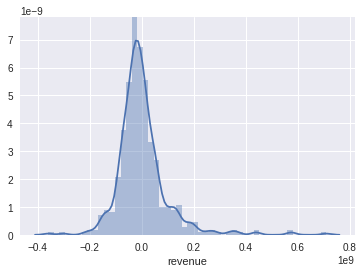

In [93]:
sns.distplot((y_test-pred),bins=50)
plt.show()

In [0]:
def rmsle(y_true, y_pred):
    return 'rmsle', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False

In [95]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('RMSLE:', rmsle(y_test, pred))

MAE: 62736650.024934866
MSE: 9730288760802592.0
RMSE: 98642226.05356488
RMSLE: ('rmsle', 1.436716443961077, False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [96]:
lr = LGBMRegressor(boosting_type='dart',num_leaves=20,max_depth=-1,min_data_in_leaf=20, learning_rate=0.2,n_estimators=500,subsample_for_bin=200000,
                   class_weight=None,min_split_gain=0.0,min_child_weight=0.001,subsample=0.1,subsample_freq=0,colsample_bytree=0.75,reg_alpha=0.0,reg_lambda=0.0,
                   random_state=101,n_jobs=-1)
lr.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric=rmsle,verbose=False)
pred = lr.predict(X_test, num_iteration=lr.best_iteration_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('RMSLE:', rmsle(y_test, pred))

MAE: 4939465.165401192
MSE: 217620823124349.66
RMSE: 14751976.922580568
RMSLE: ('rmsle', 1.1588912715928728, False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


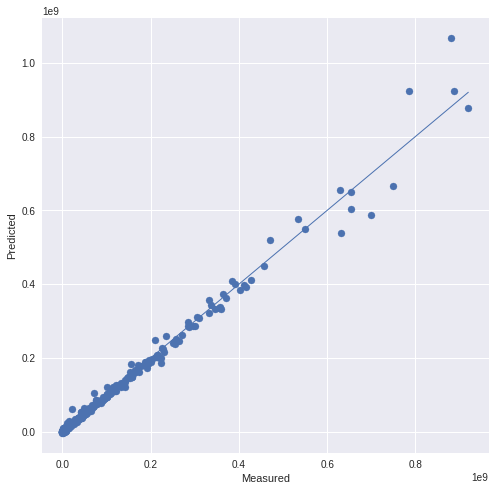

In [102]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [103]:
lr.best_score_

defaultdict(dict,
            {'valid_0': {'l2': 217620803246481.47,
              'rmsle': 1.1588912715928696}})

In [0]:
# features = list(X.columns)

importance = lr.feature_importances_

# feature_indexes_by_importance = importance.argsort()
# for index in feature_indexes_by_importance:
#     print('{}-{:.2f}%'.format(features[index], (importance[index] *100.0)))

In [110]:
importance

array([ 496, 1561,    0,  789, 4115,  244,  179,  353,  494,   73,   14,
        126,   60,   23,    0,   30,    3,    1,    2,    0,    0,   47,
         21,   30,   20,    3,    0,    0,    0,    2,    0,    4,    0,
          0,    0,    0,    0,    1,    0,   70,   11,    0,   16,    7,
          0,    2,    0,    0,    1,    2,  131,    0,    0,   75,   22,
          6,   33,    5,   86,   18,    0,    0,   22,    7,   62,    1,
          0,    0,    1,    6,    0,    0,    0,   47,    1,   18,   32,
          1,   34,    2,    0,    0,    0,    2,   29,    0,    0,    0,
          0,    0,    0,    0,    0,   58,    1,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [111]:
lr.n_estimators

500